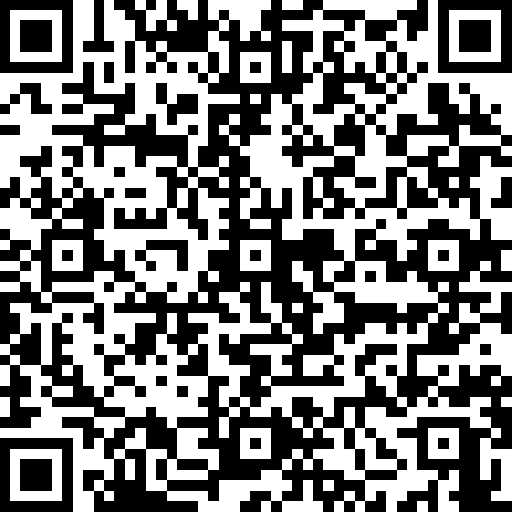

# [Cryogenic Calibration Template](https://github.com/lafefspietz/mm4250-ecal/blob/main/ecal.ipynb)

See [github repository](https://github.com/lafefspietz/mm4250-ecal) for details, as well as the IEEE Journal of Microwaves paper [Cryogenic RF MEMS Switch With Electronic Calibration Capability](https://doi.org/10.1109/JMW.2025.3638273).

To use this notebook, put all the "ideals" [Touchstone files](https://en.wikipedia.org/wiki/Touchstone_file) in an "ideals" folder wherever the notebook is, and replace "mydata" with whatever folder your raw Touchstone files are in, and be sure to label files according to which port they are on for clarity, as well as what temperature if you are taking data at multiple temperatures.  To put the ideals in the ideals folder, you can download [this zip file](https://github.com/lafefspietz/mm4250-ecal/raw/refs/heads/main/nist-mm4250-ideals.zip) and unzip it and it will create the folder with the files in it. The make sure that folder is in a path that your Jupyter notebook scan see.

This notebook requires [numpy](https://numpy.org/), [scikti-rf](https://scikit-rf.org/), and [matplotlib](https://matplotlib.org/).  If any of those are not installed, use "pip install" as follows for whatever is missing:

```
pip install matplotlib
pip install numpy
pip install scikit-rf
```

In [5]:
# load needed python libraries matplotlib, numpy, and scikit-rf
import matplotlib.pyplot as plt
import numpy as np
import skrf as rf

In [7]:
# load all Touchstone files in "ideals" folder into scikit-rf
ideals = rf.read_all('ideals')
# load all Touchstone files in "mydata" folder into scikit-rf
mydata =  rf.read_all('mydata')

In [15]:
# create a Python list of scikit-rf "network objects" of short open and load ideals for each of the six ports 
my_ideals_cold_port1 = [\
    ideals['ideal_cold_port1_short'],
    ideals['ideal_cold_port1_open'],
    ideals['ideal_cold_port1_load'],
]
my_ideals_cold_port2 = [\
    ideals['ideal_cold_port2_short'],
    ideals['ideal_cold_port2_open'],
    ideals['ideal_cold_port2_load'],
]
my_ideals_cold_port3 = [\
    ideals['ideal_cold_port3_short'],
    ideals['ideal_cold_port3_open'],
    ideals['ideal_cold_port3_load'],
]
my_ideals_cold_port4 = [\
    ideals['ideal_cold_port4_short'],
    ideals['ideal_cold_port4_open'],
    ideals['ideal_cold_port4_load'],
]
my_ideals_cold_port5 = [\
    ideals['ideal_cold_port5_short'],
    ideals['ideal_cold_port5_open'],
    ideals['ideal_cold_port5_load'],
]
my_ideals_cold_port6 = [\
    ideals['ideal_cold_port6_short'],
    ideals['ideal_cold_port6_open'],
    ideals['ideal_cold_port6_load'],
]
my_ideals_warm_port1 = [\
    ideals['ideal_warm_port1_short'],
    ideals['ideal_warm_port1_open'],
    ideals['ideal_warm_port1_load'],
]
my_ideals_warm_port2 = [\
    ideals['ideal_warm_port2_short'],
    ideals['ideal_warm_port2_open'],
    ideals['ideal_warm_port2_load'],
]
my_ideals_warm_port3 = [\
    ideals['ideal_warm_port3_short'],
    ideals['ideal_warm_port3_open'],
    ideals['ideal_warm_port3_load'],
]
my_ideals_warm_port4 = [\
    ideals['ideal_warm_port4_short'],
    ideals['ideal_warm_port4_open'],
    ideals['ideal_warm_port4_load'],
]
my_ideals_warm_port5 = [\
    ideals['ideal_warm_port5_short'],
    ideals['ideal_warm_port5_open'],
    ideals['ideal_warm_port5_load'],
]
my_ideals_warm_port6 = [\
    ideals['ideal_warm_port6_short'],
    ideals['ideal_warm_port6_open'],
    ideals['ideal_warm_port6_load'],
]


In [18]:
# create a Python list of scikit-rf "network objects" of measured short open and load using the internal standards in the switch 
my_measured_cold = [\
        mydata['ecal_short_cold'],
        mydata['ecal_open_cold'],
        mydata['ecal_load_cold'],
        ]

In [24]:
# Create scikit-rf One Port calibration objects for each of the six ports 
# This will warn that the frequencies of the ideals don't match that of your data.
# As long as your data points are all between 1 MHz and 20 GHz it should be able to automatically interpolate and these warnings may be ignored
cal_cold_port1 = rf.OnePort(\
        ideals = my_ideals_cold_port1,
        measured = my_measured_cold,
        )
cal_cold_port2 = rf.OnePort(\
        ideals = my_ideals_cold_port2,
        measured = my_measured_cold,
        )
cal_cold_port3 = rf.OnePort(\
        ideals = my_ideals_cold_port3,
        measured = my_measured_cold,
        )
cal_cold_port4 = rf.OnePort(\
        ideals = my_ideals_cold_port4,
        measured = my_measured_cold,
        )
cal_cold_port5 = rf.OnePort(\
        ideals = my_ideals_cold_port5,
        measured = my_measured_cold,
        )
cal_cold_port6 = rf.OnePort(\
        ideals = my_ideals_cold_port6,
        measured = my_measured_cold,
        )

                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Network ..
Success
                    attempting to interpolate the ideal[1] Network ..
Success
                    attempting to interpolate the ideal[2] Network ..
Success
                    attempting to interpolate the ideal[0] Netwo

In [30]:
# Run each calibration, performing the algebra to get from the measured and ideals to a usable correction
# To see exactly what is happening see source at https://scikit-rf.readthedocs.io/en/v1.8.0/_modules/skrf/calibration/calibration.html#OnePort.run
cal_cold_port1.run()
cal_cold_port2.run()
cal_cold_port3.run()
cal_cold_port4.run()
cal_cold_port5.run()
cal_cold_port6.run()

In [32]:
# Apply the correction to all the raw data and create scikit-rf network objects for corrected measurements on each of the six ports
port1_cold_corrected = cal_cold_port1.apply_cal(mydata['port1_cold'])
port2_cold_corrected = cal_cold_port2.apply_cal(mydata['port2_cold'])
port3_cold_corrected = cal_cold_port3.apply_cal(mydata['port3_cold'])
port4_cold_corrected = cal_cold_port4.apply_cal(mydata['port4_cold'])
port5_cold_corrected = cal_cold_port5.apply_cal(mydata['port5_cold'])
port6_cold_corrected = cal_cold_port6.apply_cal(mydata['port6_cold'])

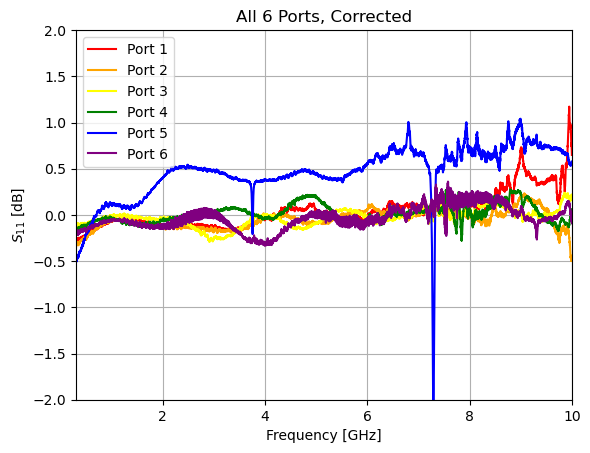

In [159]:
fghz = port1_cold_corrected.f/1e9
plt.plot(fghz,port1_cold_corrected.s_db[:,0,0],color="red")
plt.plot(fghz,port2_cold_corrected.s_db[:,0,0],color="orange")
plt.plot(fghz,port3_cold_corrected.s_db[:,0,0],color="yellow")
plt.plot(fghz,port4_cold_corrected.s_db[:,0,0],color="green")
plt.plot(fghz,port5_cold_corrected.s_db[:,0,0],color="blue")
plt.plot(fghz,port6_cold_corrected.s_db[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
plt.ylim(-2,2)
plt.title("All 6 Ports, Corrected")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

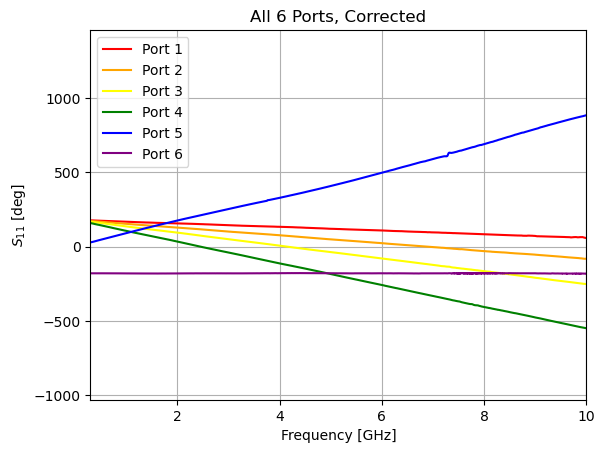

In [40]:
fghz = port1_cold_corrected.f/1e9
plt.plot(fghz,port1_cold_corrected.s_deg_unwrap[:,0,0],color="red")
plt.plot(fghz,port2_cold_corrected.s_deg_unwrap[:,0,0],color="orange")
plt.plot(fghz,port3_cold_corrected.s_deg_unwrap[:,0,0],color="yellow")
plt.plot(fghz,port4_cold_corrected.s_deg_unwrap[:,0,0],color="green")
plt.plot(fghz,port5_cold_corrected.s_deg_unwrap[:,0,0],color="blue")
plt.plot(fghz,port6_cold_corrected.s_deg_unwrap[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
#plt.ylim(-2,2)
plt.title("All 6 Ports, Corrected")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [deg]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

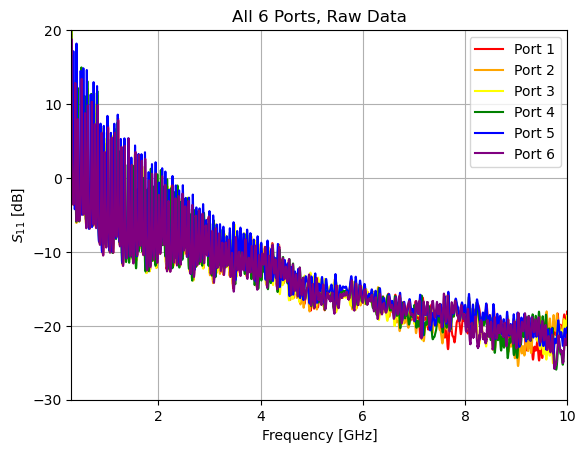

In [46]:
fghz = port1_cold_corrected.f/1e9
plt.plot(fghz,mydata['port1_cold'].s_db[:,0,0],color="red")
plt.plot(fghz,mydata['port2_cold'].s_db[:,0,0],color="orange")
plt.plot(fghz,mydata['port3_cold'].s_db[:,0,0],color="yellow")
plt.plot(fghz,mydata['port4_cold'].s_db[:,0,0],color="green")
plt.plot(fghz,mydata['port5_cold'].s_db[:,0,0],color="blue")
plt.plot(fghz,mydata['port6_cold'].s_db[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
plt.ylim(-30,20)
plt.title("All 6 Ports, Raw Data")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

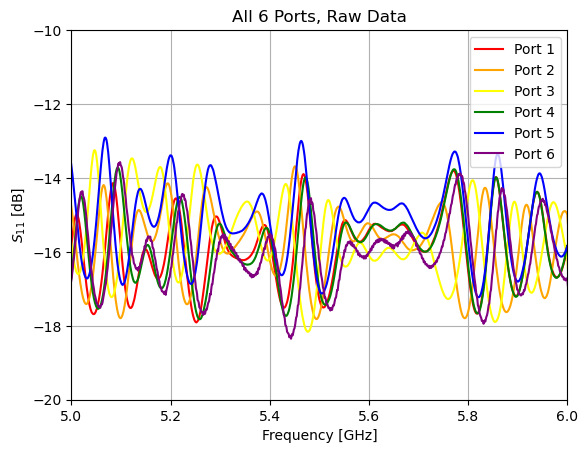

In [57]:
fghz = port1_cold_corrected.f/1e9
plt.plot(fghz,mydata['port1_cold'].s_db[:,0,0],color="red")
plt.plot(fghz,mydata['port2_cold'].s_db[:,0,0],color="orange")
plt.plot(fghz,mydata['port3_cold'].s_db[:,0,0],color="yellow")
plt.plot(fghz,mydata['port4_cold'].s_db[:,0,0],color="green")
plt.plot(fghz,mydata['port5_cold'].s_db[:,0,0],color="blue")
plt.plot(fghz,mydata['port6_cold'].s_db[:,0,0],color="purple")

plt.xlim(5,6)
plt.grid()
plt.ylim(-20,-10)
plt.title("All 6 Ports, Raw Data")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

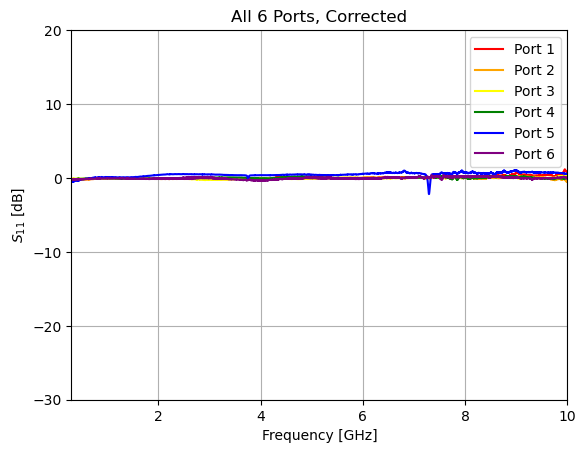

In [53]:
fghz = port1_cold_corrected.f/1e9
plt.plot(fghz,port1_cold_corrected.s_db[:,0,0],color="red")
plt.plot(fghz,port2_cold_corrected.s_db[:,0,0],color="orange")
plt.plot(fghz,port3_cold_corrected.s_db[:,0,0],color="yellow")
plt.plot(fghz,port4_cold_corrected.s_db[:,0,0],color="green")
plt.plot(fghz,port5_cold_corrected.s_db[:,0,0],color="blue")
plt.plot(fghz,port6_cold_corrected.s_db[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
plt.ylim(-30,20)
plt.title("All 6 Ports, Corrected")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [dB]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))

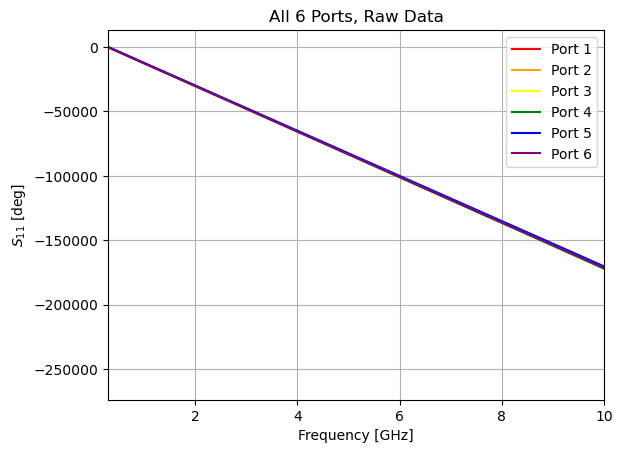

In [51]:
fghz = port1_cold_corrected.f/1e9
plt.plot(fghz,mydata['port1_cold'].s_deg_unwrap[:,0,0],color="red")
plt.plot(fghz,mydata['port2_cold'].s_deg_unwrap[:,0,0],color="orange")
plt.plot(fghz,mydata['port3_cold'].s_deg_unwrap[:,0,0],color="yellow")
plt.plot(fghz,mydata['port4_cold'].s_deg_unwrap[:,0,0],color="green")
plt.plot(fghz,mydata['port5_cold'].s_deg_unwrap[:,0,0],color="blue")
plt.plot(fghz,mydata['port6_cold'].s_deg_unwrap[:,0,0],color="purple")

plt.xlim(0.3,10)
plt.grid()
#plt.ylim(-2,2)
plt.title("All 6 Ports, Raw Data")
plt.xlabel('Frequency [GHz]')
plt.ylabel('$S_{11}$ [deg]')
plt.legend(("Port 1","Port 2","Port 3","Port 4","Port 5","Port 6"))